## 1er Parcial - Simulación Computacional 2018-I


_(0.5 puntos)_
** 1) Son dos distribuciones de probabilidad discretas: 1. Distribución Exponencial 2. Distribución Binomial 3. Distribución Normal 4. Distribución Bernoulli**

    A. Si las opciones 1 y 2 son correctas
    B. Si las opciones 2 y 3 son correctas
    C. Si las opciones 3 y 4 son correctas
    D. Si las opciones 2 y 4 son correctas
    E. Si las opciones 1 y 3 son correctas

D.

_(0.5 puntos)_
**2) Una secuencia de valores pseudoaletorios debe asegurar: 1. Uniformidad 2. Complejidad 3. Aleatoriedad 4. Circularidad**

    A. Si las opciones 1 y 2 son correctas
    B. Si las opciones 2 y 3 son correctas
    C. Si las opciones 3 y 4 son correctas
    D. Si las opciones 2 y 4 son correctas
    E. Si las opciones 1 y 3 son correctas

E.

_(0.5 puntos)_
**3) Sea $X_n = ( aX_{n-1} + b ) \mod m$ un generador congruencial con los siguientes parámetros: $m=731$, $a=99999$, $b=123$ y $X_0=987654321$ ¿Cúales son los primeros veinticinco números aleatorios $U_i$? (con cuatro cifras decimales de precisión, Ej. 0.1234)**


In [9]:
import math

xn = 987654321
a = 99999
m = 731
c = 123

def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return (x/m)

for i in range(25):
    u = generar_aleatorio()
    print(format(u,".4"))

0.4241
0.4049
0.2394
0.7373
0.04104
0.09439
0.1984
0.8112
0.1081
0.1737
0.4555
0.7483
0.4213
0.8098
0.3105
0.2093
0.1915
0.8235
0.2859
0.8536
0.8317
0.07114
0.6402
0.4159
0.6197


_(0.5 puntos)_ **4) ¿Cúal es el valor del estadístico de Chi-cuadrado para una secuencia de $2000$ numeros aleatorios y un $k=100$ de un generador congruencial mixto con $a = 16645$, $b = 13467$, $m = 317$, $X_0 = 999$?**

In [14]:
import math

class chi2:
    
    xn = 0
    a = 0 
    m = 0
    c = 0
    n = 0
    alp = 0
    k = 0
    plt1 = pl
    
    
    def __init__(self,alp,k,xn,a,m,n,c = 0):
        self.xn = xn
        self.a = a
        self.m = m
        self.c = c
        self.n = n
        self.alp = alp
        self.k = k

    def generar_aleatorio(self):
        x = (self.a*self.xn + self.c) % self.m
        self.xn = x
        return(x/self.m)
        
    def getvAl(self):
        v = [None]*self.n
        for i in range(self.n):
            v[i] = self.generar_aleatorio()
        return v
    
    def getFre(self,v):
        fre = pl.hist(v,self.k)[0]
        pl.close()
        return fre
    
    def chi_2(self):
        v = self.getvAl()
        re = self.getFre(v)
        suma = 0
        ex = self.n/self.k
        
        for i in range(self.k):
            suma += (re[i] - ex )**2/ex
            
        print("Estadistico: ",suma)



a = 16645
c = 13467
m = 317
xo = 999
k = 100
n = 2000
alpha = 16.919

x = chi2(alpha,k,xo,a,m,n,c)
x.chi_2()


Estadistico:  616.5


_(0.5 puntos)_
**5) Sea $X_n = ( aX_{n-1} + b )$ mod $m$ un generador congruencial con los siguientes parámetros: $m=271$, $a=139$, $b=17$ y $X_0=9$, generar los primeros $10$ valores $X_i$ y $U_i$. ¿Cúales son los primeros cinco numeros aleatorios $U_i$?**

In [41]:
import math

xn = 9
a = 139
m = 271
c = 17

def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return (x/m)

for i in range(5):
    u = generar_aleatorio()
    x = u*m
    print("X"+str(i+1)+": "+str(x)+"   "+"U"+str(i+1)+": "+str(u))

X1: 184.0   U1: 0.6789667896678967
X2: 119.0   U2: 0.43911439114391143
X3: 27.0   U3: 0.0996309963099631
X4: 247.0   U4: 0.9114391143911439
X5: 204.0   U5: 0.7527675276752768


_(0.5 puntos)_
**6) Dados los siguientes valores de la distribución de probabilidad discreta de la variable aleatoria $X$ de un dado: $X = {1,2,3,4,5,6}$, $p(X) = {0.2,0.1,0.05,0.2,0.05,0.4}$, ¿Qué valores retornaría el generador de variables aleatorias por el método de la inversión si los números aleatorios generados son: $U = {0.4280, 0.5609, 0.0258, 0.6531, 0.8487, 0.0332, 0.6790, 0.4391}$?**

In [40]:
fa = []
n = 0
i = 0

def inicializar(pp,uu):
    global p,u,n
    p = pp
    u= uu
    n = len(p)
    
        
def set_fa():
    global fa, valido
    x0 = p[0]
    fa.append(x0)
    for i in range(1,n):
        x0 = x0 + p[i]
        fa.append(x0)
    #print(fa)
        
def get_aleatorio():
    global i
    x = u[i]
    if(i<n):
        i += 1
    return (x)

def transInv():
    set_fa()
    u = 0
    i = 0
    va = [None]*n;
    cont = n;
    while cont>0:
        u = get_aleatorio()
        i = buscarmayor(u)
        if(i != -1):
            if(u < fa[i]):
                cont-=1
                print(str(u) + " : " + str(i+1))
            if((i+1) not in va):
                va[i] = i+1
    print("Variables Aleatorias Generadas con U: ",va)
    
def buscarmayor(u):
    indice = -1
    for i in range(0,n):
        if(fa[i]-u >= 0.000000000000001):
            indice = i
            break
    return indice

if __name__ == "__main__":
    pp = [0.2,0.1,0.05,0.2,0.05,0.4]
    uu = [0.4280,0.5609,0.0258,0.6531,0.8487,0.0332,0.6790,0.4391]
    inicializar(pp,uu)
    transInv()

0.428 : 4
0.5609 : 5
0.0258 : 1
0.6531 : 6
0.8487 : 6
0.0332 : 1
Variables Aleatorias Generadas con U:  [1, None, None, 4, 5, 6]


_(1 punto)_
**7) Ud ha sido contratado para desarrollar un casino en línea. Entre los juegos del casino se necesita implementar un juego de mesa para el lanzamiento de dados el cual es necesario simular. Sin embargo, la novedad del juego en línea es que se lanzan 3 dados del estilo de World of Warcraft (WoW), es decir no necesariamente 3 dados convencionales de seis caras (d6) como en la mayoría de casinos. En este caso, Ud debe:**

    a) Implementar una función que simule la suma del lanzamiento de 3 dados usando un generador congruencial mixto y un método de generación de variables aleatorias discretas. En donde, el primer dado tiene cuatro caras (d4), el segundo dado tiene diez caras (d10), y el tercero dado tiene 20 caras (d20).
    b) Generar y mostrar la suma de los tres dados para 1000 lanzamientos.

**Tomando en cuenta que la variable aleatoria es la suma de las caras de los tres dados, entonces:**

    c) ¿Cuál es el valor esperado teórico?
    d) ¿Cuál es el promedio de los anteriores 1000 lanzamientos?
    e) ¿Cuál es la moda de los anteriores 1000 lanzamientos?

In [68]:
import math
import time
from datetime import datetime

a = 25214903917 
m = 2 ** 48 - 1
c = 11
xn = 0

def inicializar(nn,pp,cant,xo):
    global n,p,cnt,xn
    xn = xo
    cnt = cant
    n = nn
    p = pp
    
def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return (x/m)

def transInv():
    ct = cnt
    a = 1
    va = [0]*cnt
    uu = [0]*cnt
    while ct>0:
        c = p/(1-p)
        i = 0
        pr = (1-p)**n
        F = pr
        u = generar_aleatorio()
        ct1 = n
        while ct1 > 0:
            if(u<F):
                va[i] = i+1
                uu[i] = u
                break
            else:
                pr = (c*(n-1)/(i+1))*pr
                F = F + pr
                i += 1
            ct1-=1
        ct-=1
    print(str(va) + " : " + str(uu))
    return va

def sumar(a,b,d):
    suma = [0]*cnt
    for i in range(cnt):
        suma[i]=a[i]+b[i]+d[i]
    print(suma)
    

if __name__ == "__main__":
    it = 1000
    xo = datetime.now().microsecond
    print("d4")
    inicializar(4,1/4,it,xo)
    a = transInv()
    print("d10")
    inicializar(10,1/10,it,xo)
    b = transInv()
    print("d20")
    d = inicializar(20,1/20,it,xo)
    transInv()
    #sumar(a,b,d)

d4
[1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

MemoryError: 

_(1 punto)_
**8) Calcular el área de una elipse con el método de Monte Carlo.**

    a) Implemente el método de Monte Carlo para calcular y mostrar el área estimada de una elipse con un semieje mayor $a = 7$ y semieje mejor $b = 4$ centrado en el origen $x,y = (0,0)$ generando $1000$ coordenadas aleatorias (X,Y) en el rango de $X=[-a,a]$ y $Y=[-b,b]$.
    b) Calcule el área real de la elipse.
    c) Grafique los puntos aleatorios generados que caen dentro del círculo en rojo y los que caen fuera del círculo en azul 

a)
Area Elipse Estimada:  85.568

b)
Area Elipse:  87.96459430051421
 
c)


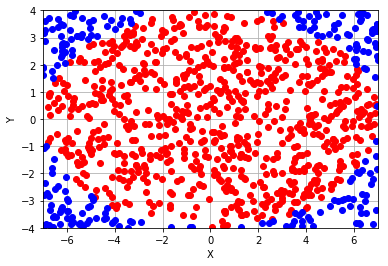

In [30]:
import math
import time
from datetime import datetime
import matplotlib.pyplot as pl
%matplotlib inline

xn1 = datetime.now().microsecond
xn2 = 3000000 + datetime.now().microsecond

a = 25214903917 
m = 2 ** 48 - 1
c = 11

def generar_aleatorio(x):
    xn = (a*x + c) % m
    return (xn/m)

def montecarlo_d(mn,a,b,c,d,f):
    n = 0
    x = 0
    y = 0
    xni = xn1
    xnj = xn2
    vfx = []
    vdx = []
    vfy = []
    vdy = []
    suma = 0
    while n<mn:
        u1 = generar_aleatorio(xni)
        u2 = generar_aleatorio(xnj)
        xni = u1*m
        xnj = u2*m
        x = a + (b-a)*u1
        y = c + (d-c)*u2
        if(f(x,y)<=1):
            vdx.append(x)
            vdy.append(y)
            suma = suma + 1
        else:
            vfx.append(x)
            vfy.append(y)
            
        n = n + 1
    return suma/n*4*b*d,vdx,vdy,vfx,vfy,b,d

def graf(v1,k1,v2,k2,a,b):
    
    pl.ylabel('Y')
    pl.xlabel('X')
   
    pl.plot(v1,k1,'ro',color="red")
    pl.plot(v2,k2,'ro',color="blue")
    pl.grid(True)
    pl.axis([-a,a,-b,b])
    pl.show() 

if __name__ == "__main__":
    a = 7
    b = 4
    n = 1000
    areaE,vdx,vdy,vfx,vfy,c,d = montecarlo_d(n,-a,a,-b,b,lambda x,y: x**2/a**2 + y**2/b**2)
    area = math.pi*a*b
    print("a)")
    print("Area Elipse Estimada: ", areaE)
    print("")
    print("b)")
    print("Area Elipse: ",area)
    print(" ")
    print("c)")
    graf(vdx,vdy,vfx,vfy,c,d)
    #print("Diferencia: ",abs(areaE - area))